In [20]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

# Part I

### Exploring a Cars dataset

Source: https://www.kaggle.com/datasets/roger1315/automobiles

In [21]:
automobile_df = pd.read_csv('./datasets/auto-mpg.csv')

automobile_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504
199,20.0,6,225.0,100,3651,17.7,76,1,dodge aspen se
73,13.0,8,307.0,130,4098,14.0,72,1,chevrolet chevelle concours (sw)
125,20.0,6,198.0,95,3102,16.5,74,1,plymouth duster
94,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
41,14.0,8,318.0,150,4096,13.0,71,1,plymouth fury iii
61,21.0,4,122.0,86,2226,16.5,72,1,ford pinto runabout
200,18.0,6,250.0,78,3574,21.0,76,1,ford granada ghia
266,30.0,4,98.0,68,2155,16.5,78,1,chevrolet chevette
335,35.0,4,122.0,88,2500,15.1,80,2,triumph tr7 coupe


### Cleaning the dataset

In [22]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])
automobile_df.drop(['model year'], axis=1, inplace=True)
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
265,17.5,8,318.0,140,4080,13.7,45
258,20.6,6,231.0,105,3380,15.8,45
77,22.0,4,121.0,76,2511,18.0,51
246,32.8,4,78.0,52,1985,19.4,45
172,25.0,4,90.0,71,2223,16.5,48


In [23]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,47.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,41.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,44.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,47.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,50.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,53.000000


In [24]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<AxesSubplot: >

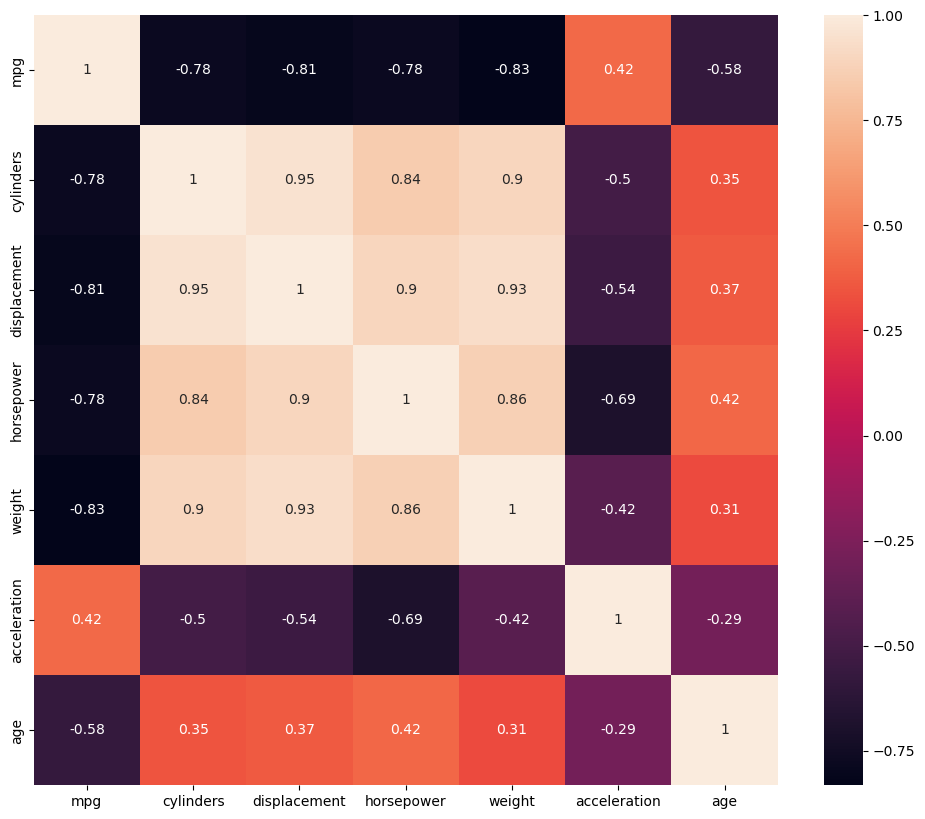

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True)

In [26]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.to_csv('./datasets/auto-mpg-processed.csv', index=False)

# Part II

### Testing out Linear Regression (with 1 feature)

In [27]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

In [28]:
FEATURES = list(automobile_df.columns[1:])
FEATURES

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'age']

For cylinders vs mpg
Training score:  0.6049873199900674
Testing score:  0.5879473729861564


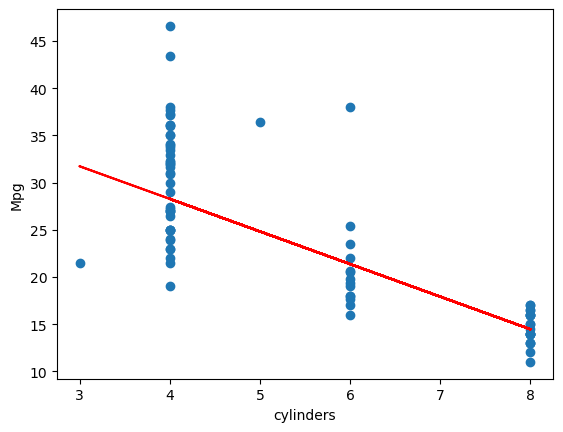

For displacement vs mpg
Training score:  0.6355410136601535
Testing score:  0.6850735769217868


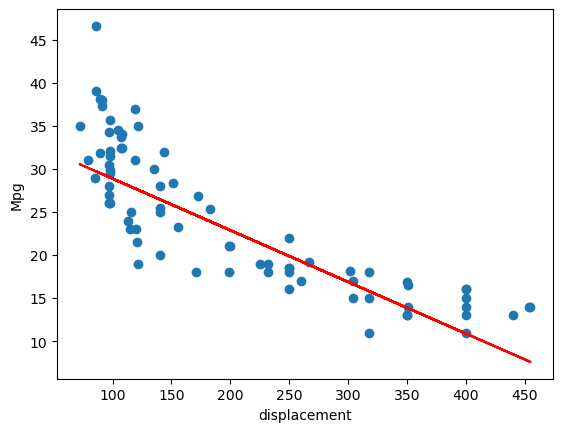

For horsepower vs mpg
Training score:  0.6412231470307308
Testing score:  0.37399461396398104


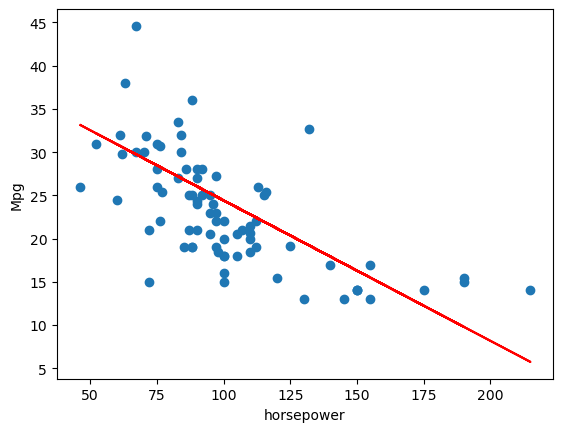

For weight vs mpg
Training score:  0.6980989751429098
Testing score:  0.6653349038258626


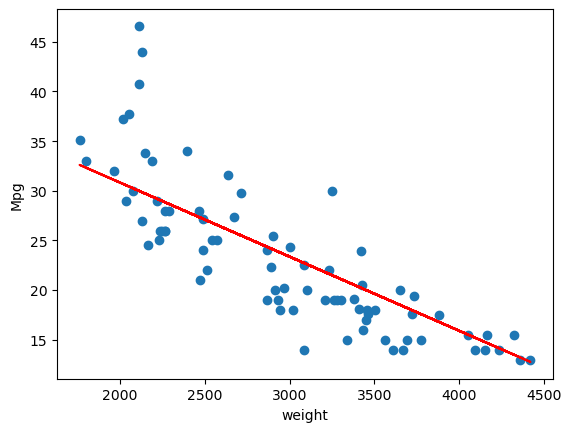

For acceleration vs mpg
Training score:  0.18859220669194232
Testing score:  0.13035683634790796


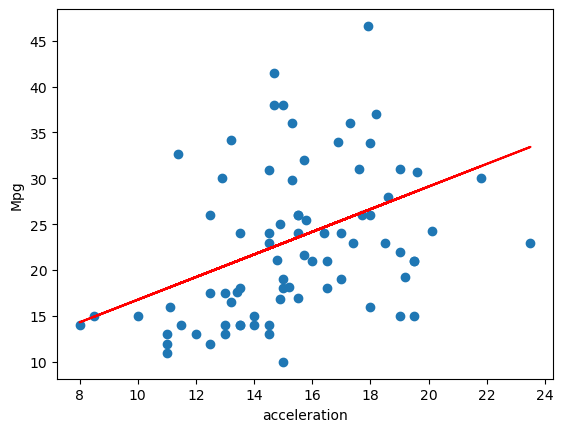

For age vs mpg
Training score:  0.33700527046906137
Testing score:  0.3220391563240145


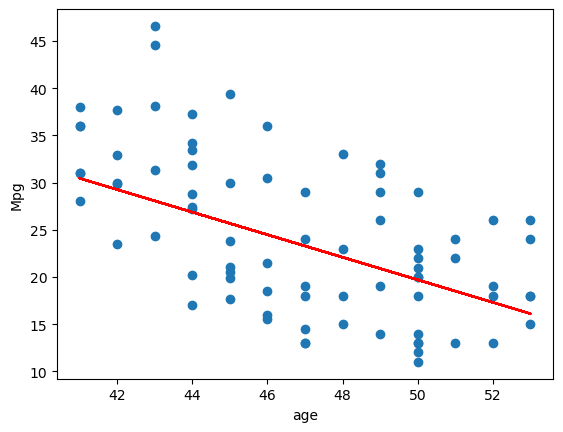

In [29]:
for feature in FEATURES: 


    X = automobile_df[[feature]]
    Y = automobile_df['mpg']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    linear_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

    linear_model.fit(x_train, y_train)

    print("For " + feature + " vs " + "mpg")

    print('Training score: ', linear_model.score(x_train, y_train))

    y_pred = linear_model.predict(x_test)

    print('Testing score: ', r2_score(y_test, y_pred))

    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, color='r')

    plt.xlabel(feature)
    plt.ylabel('Mpg')
    plt.show()


### Testing out Linear Regression (with multiple features)

In [30]:
from itertools import combinations

feature_combinations = list()

for n in range(len(FEATURES) + 1):
    feature_combinations += list(combinations(FEATURES, n))


feature_combinations = feature_combinations[1:]

for idx, i in enumerate(feature_combinations):
    feature_combinations[idx] = list(i)

feature_combinations = list(filter(lambda combination: len(combination) > 1, feature_combinations) )
print(feature_combinations)

[['cylinders', 'displacement'], ['cylinders', 'horsepower'], ['cylinders', 'weight'], ['cylinders', 'acceleration'], ['cylinders', 'age'], ['displacement', 'horsepower'], ['displacement', 'weight'], ['displacement', 'acceleration'], ['displacement', 'age'], ['horsepower', 'weight'], ['horsepower', 'acceleration'], ['horsepower', 'age'], ['weight', 'acceleration'], ['weight', 'age'], ['acceleration', 'age'], ['cylinders', 'displacement', 'horsepower'], ['cylinders', 'displacement', 'weight'], ['cylinders', 'displacement', 'acceleration'], ['cylinders', 'displacement', 'age'], ['cylinders', 'horsepower', 'weight'], ['cylinders', 'horsepower', 'acceleration'], ['cylinders', 'horsepower', 'age'], ['cylinders', 'weight', 'acceleration'], ['cylinders', 'weight', 'age'], ['cylinders', 'acceleration', 'age'], ['displacement', 'horsepower', 'weight'], ['displacement', 'horsepower', 'acceleration'], ['displacement', 'horsepower', 'age'], ['displacement', 'weight', 'acceleration'], ['displacement

In [31]:
best_test_score = 0
best_features_combination = []
best_y_pred = []

for feature_combination in feature_combinations:
    X = automobile_df[feature_combination]
    Y = automobile_df['mpg']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    linear_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

    linear_model.fit(x_train, y_train)

    print("For " + str(feature_combination) + " vs " + "mpg")

    print('Training score: ', linear_model.score(x_train, y_train))

    y_pred = linear_model.predict(x_test)

    test_score = r2_score(y_test, y_pred)

    print('Testing score: ', test_score)

    if test_score > best_test_score:
        best_test_score = test_score
        best_features_combination = feature_combination
        best_y_pred = y_pred

For ['cylinders', 'displacement'] vs mpg
Training score:  0.6420609834298063
Testing score:  0.6757519705943886
For ['cylinders', 'horsepower'] vs mpg
Training score:  0.6592963450856935
Testing score:  0.6360150895191815
For ['cylinders', 'weight'] vs mpg
Training score:  0.6929852106764274
Testing score:  0.7025772139428537
For ['cylinders', 'acceleration'] vs mpg
Training score:  0.5886703331941625
Testing score:  0.6629844163297693
For ['cylinders', 'age'] vs mpg
Training score:  0.7160892459030952
Testing score:  0.6880110595895402
For ['displacement', 'horsepower'] vs mpg
Training score:  0.6602957608448063
Testing score:  0.6641214169194469
For ['displacement', 'weight'] vs mpg
Training score:  0.6864066272544618
Testing score:  0.73552304393657
For ['displacement', 'acceleration'] vs mpg
Training score:  0.6433487548804522
Testing score:  0.6430466867900713
For ['displacement', 'age'] vs mpg
Training score:  0.7403958358293892
Testing score:  0.7423064572098648
For ['horsepower

Best Feature Combination: ['horsepower', 'weight', 'acceleration', 'age']


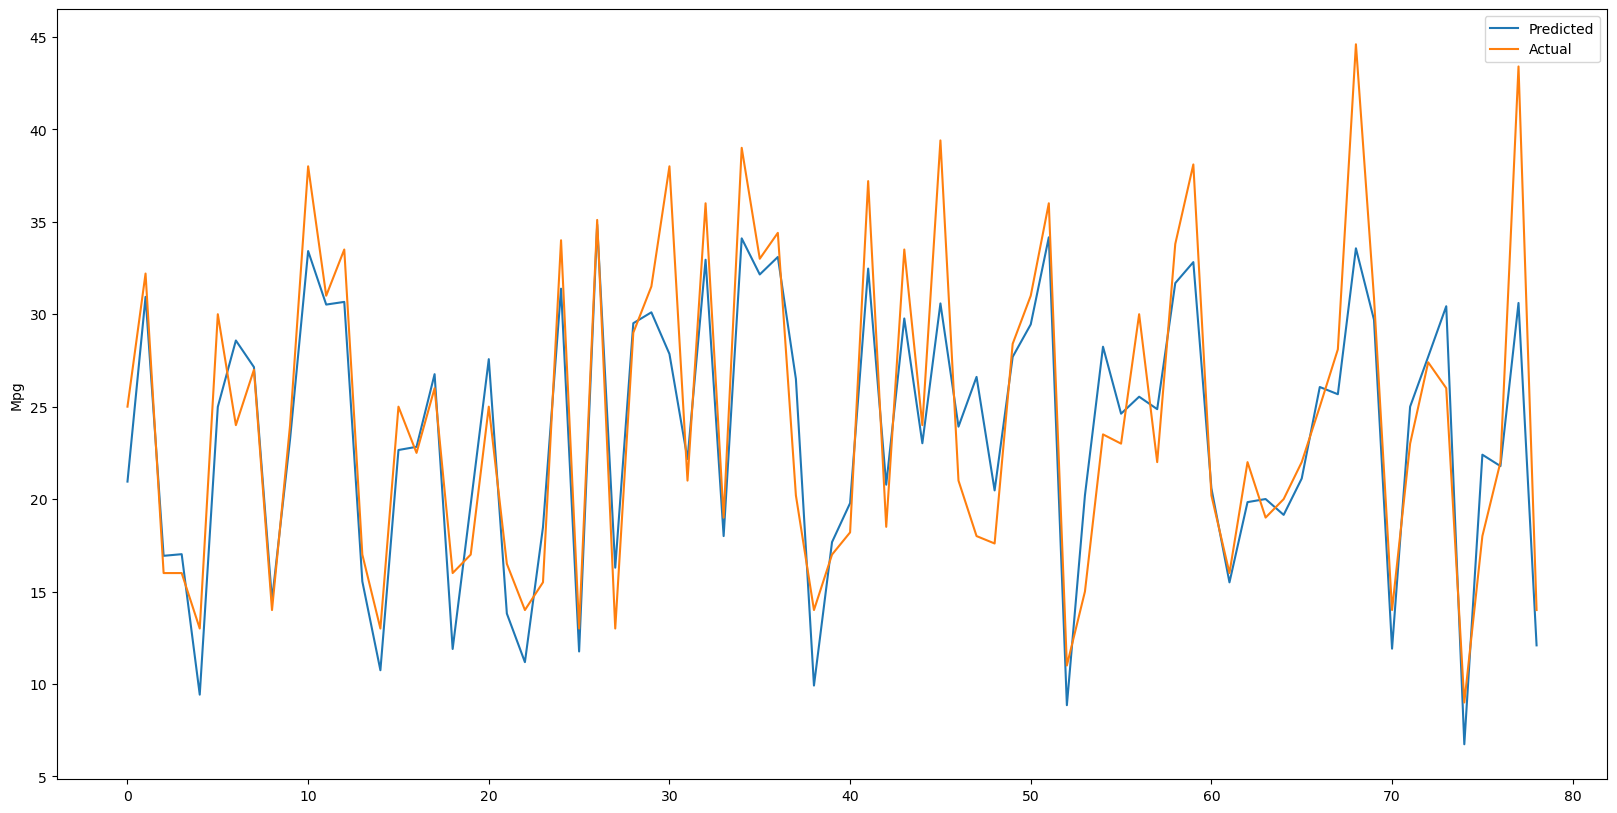

In [32]:
print("Best Feature Combination: " + str(best_features_combination))
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()

# Part III


### Helper functions for testing and comparing methods

In [33]:
results_dict = {}

def build_model(regression_fn, y_col_names, x_col_names, dataset, test_frac=0.2, preprocess_fn=None):
    
    X = dataset[x_col_names]
    Y = dataset[y_col_names]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    return { 'training_score': model.score(x_train, y_train), 'test_score': r2_score(y_test, y_pred) } 

def compare_results():
    for key in results_dict:
        print('Regression: ', key)
        print('Training score', results_dict[key]['training_score'])
        print('Test score', results_dict[key]['test_score'])
        print()   

def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x) 

def diffArr(arr1, arr2): 
    temp = []
    for element in arr1:
        if element not in arr2:
            temp.append(element)
    
    return temp

def getFeatureCombinations(features):
    feature_combinations = list()

    for n in range(len(features) + 1):
        feature_combinations += list(combinations(features, n))


    feature_combinations = feature_combinations[1:]

    for idx, i in enumerate(feature_combinations):
        feature_combinations[idx] = list(i)

    print(feature_combinations)

    return feature_combinations

### Some Methods

Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html, https://en.wikipedia.org/wiki/Linear_regression

LASSO: https://en.wikipedia.org/wiki/Lasso_(statistics), https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Ridge Regression: https://en.wikipedia.org/wiki/Ridge_regression, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

l1 vs l2: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

Support Vector Regression: https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Stochastic Gradient Descent: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html, https://en.wikipedia.org/wiki/Stochastic_gradient_descent

Decision Tree Regression: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html, https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda, https://en.wikipedia.org/wiki/Decision_tree_learning

Least Angle Regression: https://en.wikipedia.org/wiki/Least-angle_regression, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html

K Neighbors Regression: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html, https://medium.com/analytics-vidhya/k-neighbors-regression-analysis-in-python-61532d56d8e4

In [34]:
def linear_reg(x_train, y_train):
    model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    model.fit(x_train, y_train)
    return model

def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    return model

def ridge_reg(x_train, y_train, alpha=0.5):
    model = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=alpha))
    model.fit(x_train, y_train)
    return model

def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    return model

def sgd_reg(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    return model

def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    return model

def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = make_pipeline(StandardScaler(with_mean=False), Lars(n_nonzero_coefs=n_nonzero_coefs))
    model.fit(x_train, y_train)
    return model

def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    return model

In [35]:
methods = [linear_reg, lasso_reg, ridge_reg, svr_reg, sgd_reg, decision_tree_reg, lars_reg, kneighbors_reg]
names = ["linear_reg", "lasso_reg", "ridge_reg", "svr_reg", "sgd_reg", "decision_tree_reg", "lars_reg", "kneighbors_reg"]

In [36]:
feature_combinations = getFeatureCombinations(FEATURES)

for idx, fn in enumerate(methods):
    for feature_combination in feature_combinations:
        if names[idx] == "sgd_reg":
            results_dict["mpg vs " + str(feature_combination) + " | " + names[idx]] = build_model(fn, 'mpg', feature_combination, automobile_df, preprocess_fn=apply_standard_scaler)
        else:
            results_dict["mpg vs " + str(feature_combination) + " | " + names[idx]] = build_model(fn, 'mpg', feature_combination, automobile_df)

[['cylinders'], ['displacement'], ['horsepower'], ['weight'], ['acceleration'], ['age'], ['cylinders', 'displacement'], ['cylinders', 'horsepower'], ['cylinders', 'weight'], ['cylinders', 'acceleration'], ['cylinders', 'age'], ['displacement', 'horsepower'], ['displacement', 'weight'], ['displacement', 'acceleration'], ['displacement', 'age'], ['horsepower', 'weight'], ['horsepower', 'acceleration'], ['horsepower', 'age'], ['weight', 'acceleration'], ['weight', 'age'], ['acceleration', 'age'], ['cylinders', 'displacement', 'horsepower'], ['cylinders', 'displacement', 'weight'], ['cylinders', 'displacement', 'acceleration'], ['cylinders', 'displacement', 'age'], ['cylinders', 'horsepower', 'weight'], ['cylinders', 'horsepower', 'acceleration'], ['cylinders', 'horsepower', 'age'], ['cylinders', 'weight', 'acceleration'], ['cylinders', 'weight', 'age'], ['cylinders', 'acceleration', 'age'], ['displacement', 'horsepower', 'weight'], ['displacement', 'horsepower', 'acceleration'], ['displac

/Users/anishmitagar/miniforge3/envs/pytorch/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/anishmitagar/miniforge3/envs/pytorch/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

In [37]:
compare_results()

Regression:  mpg vs ['cylinders'] | linear_reg
Training score 0.6328556342491242
Test score 0.46628067425973574

Regression:  mpg vs ['displacement'] | linear_reg
Training score 0.6294704362483645
Test score 0.7025852184889407

Regression:  mpg vs ['horsepower'] | linear_reg
Training score 0.6072100406813263
Test score 0.5948397530240475

Regression:  mpg vs ['weight'] | linear_reg
Training score 0.6802960249912873
Test score 0.7265949581120158

Regression:  mpg vs ['acceleration'] | linear_reg
Training score 0.1367629806995061
Test score 0.3022116388395871

Regression:  mpg vs ['age'] | linear_reg
Training score 0.3624746193563798
Test score 0.21616713636275753

Regression:  mpg vs ['cylinders', 'displacement'] | linear_reg
Training score 0.6420289253892306
Test score 0.6899340939568901

Regression:  mpg vs ['cylinders', 'horsepower'] | linear_reg
Training score 0.6571182409318767
Test score 0.6449904318532121

Regression:  mpg vs ['cylinders', 'weight'] | linear_reg
Training score 0.

# Part IV

### Hyperparameter tuning using grid search and 10-fold cross validation


Cross Validation: https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Grid Search: https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search

In [38]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

### For Lasso Regression

In [39]:
for feature_combination in feature_combinations:
    feats = ['mpg'] + feature_combination
    if len(feature_combination) == len(FEATURES):
        continue
    X = automobile_df.drop(feats, axis=1)
    Y = automobile_df['mpg']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    parameters = {'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}

    grid_search = GridSearchCV(Lasso(), parameters, cv=10, return_train_score=True)
    grid_search.fit(x_train, y_train)

    print("For features: " + str(diffArr(FEATURES, feature_combination)))
    print(grid_search.best_params_)

    lasso_model = Lasso(alpha=grid_search.best_params_['alpha']).fit(x_train, y_train)

    y_pred = lasso_model.predict(x_test)

    print('Training score: ', lasso_model.score(x_train, y_train))
    print('Test score: ', r2_score(y_test, y_pred))




For features: ['displacement', 'horsepower', 'weight', 'acceleration', 'age']
{'alpha': 0.6}
Training score:  0.8030987953933579
Test score:  0.8188000800893189
For features: ['cylinders', 'horsepower', 'weight', 'acceleration', 'age']
{'alpha': 0.8}
Training score:  0.8059622924643464
Test score:  0.8028141236676898
For features: ['cylinders', 'displacement', 'weight', 'acceleration', 'age']
{'alpha': 0.2}
Training score:  0.8048071530994918
Test score:  0.8176119584210093
For features: ['cylinders', 'displacement', 'horsepower', 'acceleration', 'age']
{'alpha': 0.2}
Training score:  0.7474418472870759
Test score:  0.7606078169615615
For features: ['cylinders', 'displacement', 'horsepower', 'weight', 'age']
{'alpha': 0.2}
Training score:  0.8054901417986741
Test score:  0.811047542135255
For features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
{'alpha': 1.0}
Training score:  0.7053230885612208
Test score:  0.7092210322417267
For features: ['horsepower', 'wei

### K Neighbors

In [40]:
for feature_combination in feature_combinations:
    feats = ['mpg'] + feature_combination
    if len(feature_combination) == len(FEATURES):
        continue
    X = automobile_df.drop(feats, axis=1)
    Y = automobile_df['mpg']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    parameters = {'n_neighbors': [10, 12, 14, 18, 20, 25, 30, 35, 50]}

    grid_search = GridSearchCV(KNeighborsRegressor(), parameters, cv=10, return_train_score=True)
    grid_search.fit(x_train, y_train)

    print("For features: " + str(diffArr(FEATURES, feature_combination)))
    print(grid_search.best_params_)

    kneighbors_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']).fit(x_train, y_train)

    y_pred = kneighbors_model.predict(x_test)

    print('Training score: ', kneighbors_model.score(x_train, y_train))
    print('Testing score: ', r2_score(y_test, y_pred))

For features: ['displacement', 'horsepower', 'weight', 'acceleration', 'age']
{'n_neighbors': 35}
Training score:  0.7297653160911229
Testing score:  0.7044996022944372
For features: ['cylinders', 'horsepower', 'weight', 'acceleration', 'age']
{'n_neighbors': 35}
Training score:  0.7221445084823305
Testing score:  0.7277253929074639
For features: ['cylinders', 'displacement', 'weight', 'acceleration', 'age']
{'n_neighbors': 35}
Training score:  0.7362209459785359
Testing score:  0.6972888513095064
For features: ['cylinders', 'displacement', 'horsepower', 'acceleration', 'age']
{'n_neighbors': 10}
Training score:  0.8193357839799758
Testing score:  0.8150302440617355
For features: ['cylinders', 'displacement', 'horsepower', 'weight', 'age']
{'n_neighbors': 30}
Training score:  0.7350781261283867
Testing score:  0.6881180577634837
For features: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
{'n_neighbors': 30}
Training score:  0.7344917316489289
Testing score:  0.6

For Support Vector Regression (Takes a long time)

In [41]:
for feature_combination in feature_combinations:
    feats = ['mpg'] + feature_combination
    if len(feature_combination) == len(FEATURES):
        continue
    X = automobile_df.drop(feats, axis=1)
    Y = automobile_df['mpg']

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    parameters = {'epsilon': [0.05, 0.1, 0.2, 0.3], 'C': [0.2, 0.3]}

    grid_search = GridSearchCV(SVR(kernel='linear'), parameters, cv=3, return_train_score=True)
    grid_search.fit(x_train, y_train)

    print("For features: " + str(diffArr(FEATURES, feature_combination)))
    print(grid_search.best_params_)

    svr_model = SVR(kernel='linear', epsilon=grid_search.best_params_['epsilon'], C=grid_search.best_params_['C']).fit(x_train, y_train)

    y_pred = svr_model.predict(x_test)

    print('Training score: ', svr_model.score(x_train, y_train))
    print('Testing score: ', r2_score(y_test, y_pred))

For features: ['displacement', 'horsepower', 'weight', 'acceleration', 'age']
{'C': 0.2, 'epsilon': 0.3}
Training score:  0.800309376231509
Testing score:  0.7670886191191344
For features: ['cylinders', 'horsepower', 'weight', 'acceleration', 'age']
{'C': 0.2, 'epsilon': 0.1}
Training score:  0.7964534152131542
Testing score:  0.8052614723017015
For features: ['cylinders', 'displacement', 'weight', 'acceleration', 'age']
{'C': 0.2, 'epsilon': 0.3}
Training score:  0.8085697223506051
Testing score:  0.7965748768868635
For features: ['cylinders', 'displacement', 'horsepower', 'acceleration', 'age']
{'C': 0.3, 'epsilon': 0.3}
Training score:  0.7353700356538005
Testing score:  0.7462261384747642
For features: ['cylinders', 'displacement', 'horsepower', 'weight', 'age']
{'C': 0.2, 'epsilon': 0.05}
Training score:  0.8094763876684902
Testing score:  0.7722680754962479


KeyboardInterrupt: 